In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [306]:
Data = pd.read_fwf("Import_file/n_0p04K.dat", skiprows=np.linspace (0,2,3), skipfooter=9, \
header=None, engine='python', sep= '\s+'); # read data starting from line 3 and excluding the 9 last lines;

Data = np.array(Data).flatten() # turns the matrix into an 1D array;

Headers = pd.read_csv("Import_file/n_0p04K.dat", header=None, nrows=3); #print (Headers) # read the Heasers
Instrument = Headers[0][0];  print ('Pattern measured on ', Instrument) # get name of the instrument;
Lambda = float(Headers[0][1].split()[1]) ; print ('Wavelength: ',Lambda, u'\u212b') # get wavelength;
Temp = float(Headers[1][1].split()[1]) ; print('Temperature: ', Temp, 'K') # get temperature;
Name = Headers[1][0] ; print('Sample name: ',Name) # get name
print()
print('2\u03B8 angle range (in degrees):') # get the different angle parameters;
Start_ang = float(Headers[0][2].split()[0]) ; print('   - Starting angle: ',Start_ang)
End_ang = float(Headers[0][2].split()[2]) ; print('   - Ending angle: ',End_ang)
Step_size = float(Headers[0][2].split()[1]) ; print('   - Step size: ', Step_size)

Footers = np.array(pd.read_csv("Import_file/n_0p04K.dat",header= None))[-9:-1].flatten(); #print(Footers) # get the footers

Pattern measured on  HRPT
Wavelength:  1.155 Å
Temperature:  0.039 K
Sample name:   Ce2Sn2O7_Cu12x50

2θ angle range (in degrees):
   - Starting angle:  3.55
   - Ending angle:  164.5
   - Step size:  0.05


Text(0, 85000, 'HRPT')

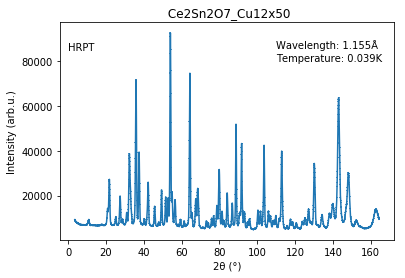

In [307]:
# Build arrays of 2theta, Intensities, errors and plot.
theta = np.linspace(Start_ang,End_ang,num= int((End_ang-Start_ang)/Step_size)+2) ;
# + 2 to account for first and last points;
Intensity = Data[0:len(theta)]; # Intensity array;
Errors = Data[len(theta):]; # error array;
plt.errorbar(theta,Intensity,yerr=Errors); # plt.plot(theta,Intensity);
plt.title(Name); 
plt.xlabel('2\u03B8 (\u00b0)');plt.ylabel('Intensity (arb.u.)')
plt.text(110,85500,'Wavelength: '+ str(Lambda) +'\u212b')
plt.text(110,80000,'Temperature: ' + str(Temp) + 'K')
plt.text(0,85000,Instrument)